In [1]:
import os
import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp
import tensorflow as tf
import tensorflow_probability.substrates.jax as tfp
from astropy.table import Table

2023-06-19 09:56:42.398598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tfd = tfp.distributions
rng = jax.random.PRNGKey(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
from lcmcmc.preprocessing import add_object_band_index, preprocess_SNANA, extract_subsample

In [4]:
from lcmcmc.utils import get_data_dir_path

In [5]:
train_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_HEAD.FITS'
train_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_PHOT.FITS'

In [6]:
df_head = Table.read(train_data_head_path, format='fits').to_pandas()
df_phot = Table.read(train_data_phot_path, format='fits').to_pandas()

In [7]:
np.unique(df_phot["PHOTFLAG"])

array([     0,   4096,   6144, 999999], dtype=int32)

In [8]:
df_phot["SNID"]

0           5081715
1           5081715
2           6596653
3           6596653
4           6596653
             ...   
1616280    54214877
1616281    54214877
1616282    54214877
1616283    54214877
1616284    54214877
Name: SNID, Length: 1616285, dtype: int64

In [9]:
df_phot["PHOTFLAG"]

0          999999
1          999999
2          999999
3          999999
4          999999
            ...  
1616280         0
1616281         0
1616282         0
1616283         0
1616284         0
Name: PHOTFLAG, Length: 1616285, dtype: int32

In [10]:
df_phot = df_phot[(df_phot["PHOTFLAG"] == 4069) | (df_phot["PHOTFLAG"] == 999999)]

In [11]:
np.amin(df_phot['FLUXCALERR'])

43.412249725972686

# Load data

In [12]:
df_head, df_phot=extract_subsample(df_head=df_head, df_phot=df_phot, event_type="random", num_sample=1000)

In [13]:
df_phot

,SNID,FLUXCAL,FLUXCALERR,FLT,MJD,FIELD,PHOTFLAG,PHOTPROB,PSF_SIG1,SKY_SIG,ZEROPT,SIM_MAGOBS
74,4273033,498.283156,93.830739,b'g',1.4,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
75,4273033,246.192217,61.378310,b'g',2.4,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
76,4273033,1343.040687,109.664671,b'r',0.1,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
77,4273033,420.252257,83.564443,b'r',3.0,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
78,4273033,260.230164,65.397384,b'r',4.3,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
...,...,...,...,...,...,...,...,...,...,...,...,...
2281,509670,244.682913,61.085503,b'g',1.3,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
2282,509670,298.308136,71.939753,b'r',1.0,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
2283,509670,398.857171,82.093527,b'r',2.0,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20
2284,509670,171.844239,48.484075,b'r',4.1,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20


In [14]:
df_phot = add_object_band_index(df_phot, bands=[b'g', b'r'])

In [15]:
df_phot

,SNID,FLUXCAL,FLUXCALERR,FLT,MJD,FIELD,PHOTFLAG,PHOTPROB,PSF_SIG1,SKY_SIG,ZEROPT,SIM_MAGOBS,object_index,band_index
74,4273033,498.283156,93.830739,b'g',1.4,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0,0
75,4273033,246.192217,61.378310,b'g',2.4,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0,0
76,4273033,1343.040687,109.664671,b'r',0.1,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0,1
77,4273033,420.252257,83.564443,b'r',3.0,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0,1
78,4273033,260.230164,65.397384,b'r',4.3,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,509670,244.682913,61.085503,b'g',1.3,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,21,0
2282,509670,298.308136,71.939753,b'r',1.0,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,21,1
2283,509670,398.857171,82.093527,b'r',2.0,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,21,1
2284,509670,171.844239,48.484075,b'r',4.1,b'N/A',999999,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,21,1


In [16]:
new_object_df = preprocess_SNANA(df_head=df_head, df_phot=df_phot, bands=[b'g', b'r'], norm_band_index=None)

In [17]:
new_object_df = new_object_df[(new_object_df["time"].values>-20) & (new_object_df["time"].values<20)]

# Load PCs

In [18]:
from kndetect.utils import load_pcs

pcs = load_pcs()

# Create joint distribution model

In [19]:
from lcmcmc.model import jd_model_pcs
from lcmcmc.parametric_fits import parametric_fn_pcs

NOTE that the flux values are normalized. 
To get the actual values, multiply flux and fluxerr columns with norm_factor

In [20]:
index = np.zeros((len(new_object_df), 2), dtype=np.int32)

index[:, 0] = np.asarray(new_object_df["object_index"].values)
index[:, 1] = np.asarray(new_object_df["band_index"].values)

x_range = jnp.asarray(new_object_df["time"])

observed_value = jnp.array(np.asarray(new_object_df["flux"]), dtype=jnp.float32)
observed_sigma = jnp.array(np.asarray(new_object_df["fluxerr"]), dtype=jnp.float32)

jd = jd_model_pcs(index, x_range, pcs)

In [21]:
x_range

Array([ 0. ,  1. ,  0. ,  2.9,  4.2,  0. ,  0. ,  0.6,  0.8,  0. ,  0. ,
        0.1,  2. ,  0. ,  0. , -1. , -0.4,  0. ,  1.8, -1. , -0.7,  0. ,
        0. ,  1.7,  2.9,  3.7,  0. ,  0. ,  0. ,  0.9,  1. ,  0. ,  2.8,
        5.3,  5.3,  0. ,  1. , -0.1,  0. ,  0. ,  1.1,  2.4,  0. ,  0. ,
        0.1,  0.1,  2.1,  0. ,  0.8,  2. ,  0. ,  0. ,  3.6,  5.1, -0.9,
        0. ,  0. ,  1.9,  4. ,  4.6, -1. ,  0. ,  2.6, -1. , -0.1,  0. ,
        2.1,  0. ,  0. ,  0. ,  0. ,  0.7,  0.9,  0. ,  1.8,  0. ,  1. ,
        1.2,  2.3, -4.1,  0. ,  0. ,  1.8,  0. ,  0. ,  2.6,  0. ,  0. ,
        0.1,  2.1,  0. ,  3.9,  4. ,  5.5,  0. ,  0.8,  4.9,  5.1,  0. ,
        0. ,  3.1,  0. ,  0.9,  0. ,  1.9,  2. ,  0. ,  0.1,  0.2, -1. ,
        0. ,  2.1,  2.1], dtype=float32)

In [22]:
observed_sigma

Array([0.18830808, 0.12317958, 0.08165402, 0.06222034, 0.04869352,
       0.15227272, 0.1775158 , 0.145411  , 0.1298698 , 0.08522357,
       0.05900838, 0.05901583, 0.04881271, 0.06279427, 0.06279427,
       0.03560012, 0.03658096, 0.03710651, 0.03319306, 0.07077604,
       0.07309003, 0.08101773, 0.0509476 , 0.04539395, 0.0398707 ,
       0.03530021, 0.2572654 , 0.16810179, 0.08530675, 0.06241416,
       0.05914566, 0.04919564, 0.03454056, 0.02140347, 0.02140347,
       0.13051477, 0.10238805, 0.10982453, 0.11102283, 0.10132293,
       0.09067208, 0.07824418, 0.04466323, 0.03355448, 0.03302141,
       0.03302141, 0.0260748 , 0.07070155, 0.05775084, 0.0386057 ,
       0.0197282 , 0.0197282 , 0.01199905, 0.01062508, 0.0948478 ,
       0.11312038, 0.07821657, 0.07544553, 0.05713948, 0.05043893,
       0.0858565 , 0.10498634, 0.07572404, 0.04741141, 0.04994255,
       0.05004452, 0.04638329, 0.25571278, 0.25571278, 0.23727055,
       0.09931783, 0.07245795, 0.06460564, 0.06917345, 0.05248

In [23]:
jd

<tfp.distributions.JointDistributionCoroutineAutoBatched 'JointDistributionCoroutineAutoBatched' batch_shape=[] event_shape=StructTuple(
  c2_hyper=[22],
  c2=[22, 2],
  c3_hyper=[22],
  c3=[22, 2],
  c1_hyper=[22],
  c1_=[22, 2],
  sigma=[113],
  obs=[113]
) dtype=StructTuple(
  c2_hyper=float32,
  c2=float32,
  c3_hyper=float32,
  c3=float32,
  c1_hyper=float32,
  c1_=float32,
  sigma=float32,
  obs=float32
)>

In [24]:
# Run the mcmc

run_mcmc = jax.jit(
    lambda seed: tfp.experimental.mcmc.windowed_adaptive_nuts(
        100, 
        jd, 
        n_chains=4, 
        seed=seed,
        sigma=observed_sigma, 
        obs=observed_value,
    )
)

rng, sample_rng = jax.random.split(rng, 2)
mcmc_samples, sampler_stats = run_mcmc(sample_rng)

In [25]:
#mcmc_samples.t0.shape

In [26]:
#mcmc_samples.t0[10, 0, 13]

In [27]:
import matplotlib.pyplot as plt

In [28]:
# Plot the posterior light curve reconstructions

0


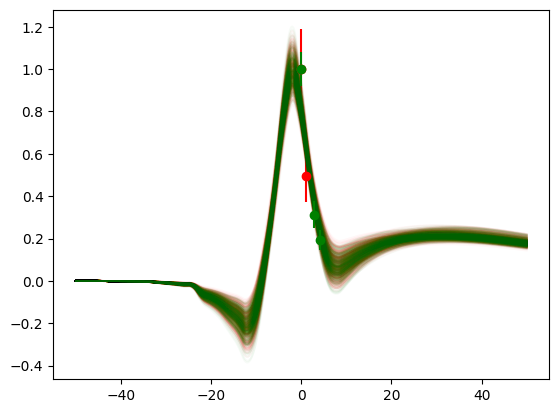

1


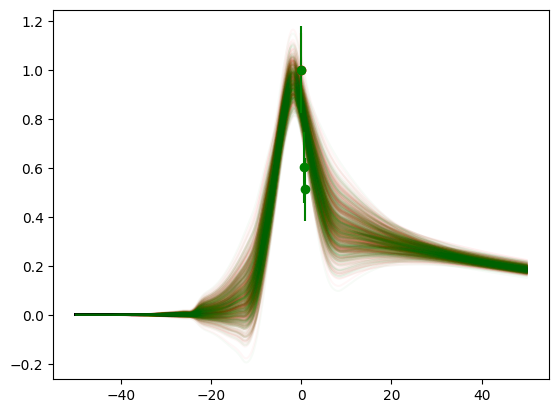

2


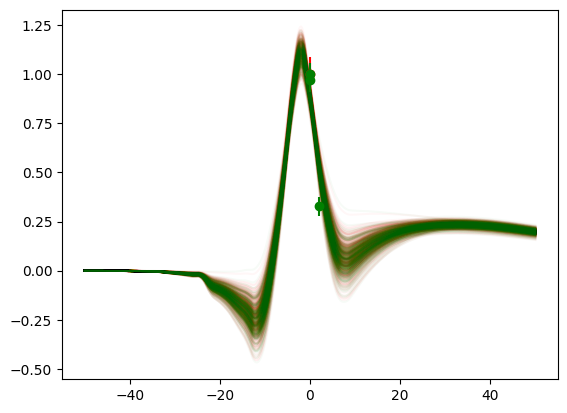

3


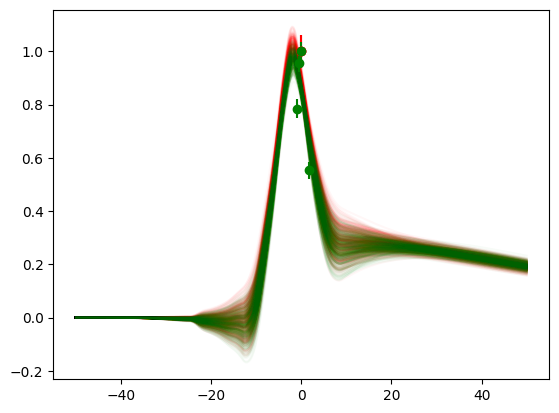

4


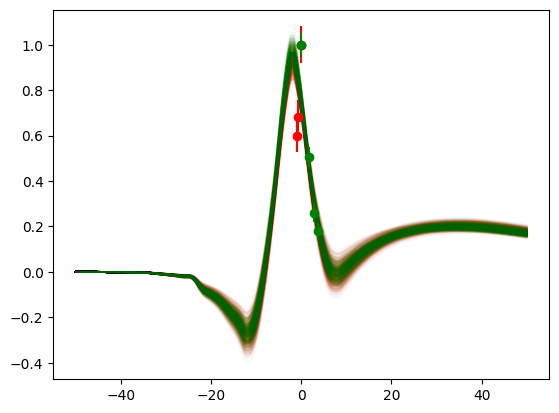

5


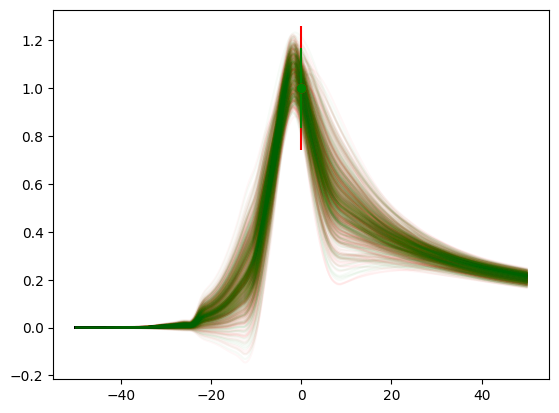

6


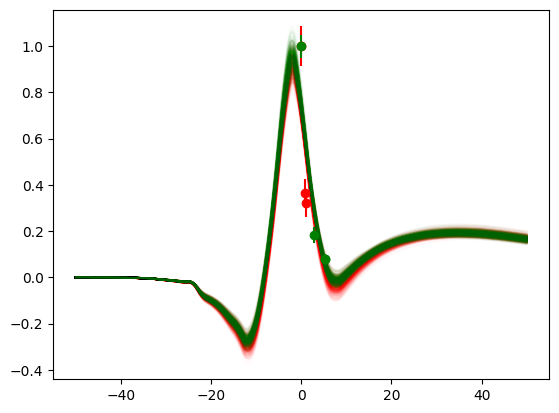

7


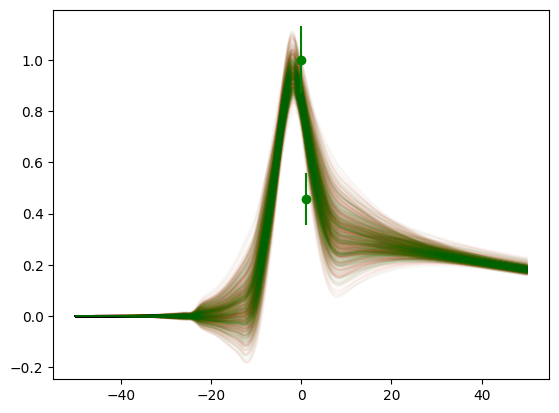

8


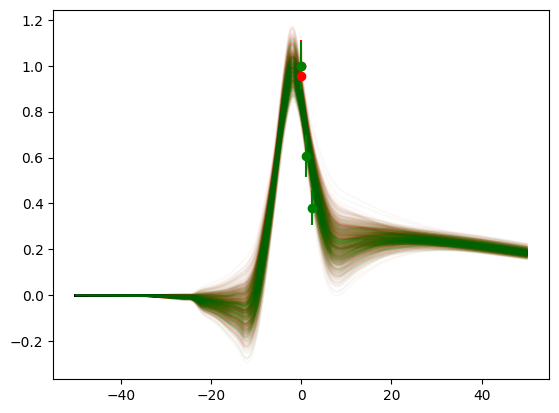

9


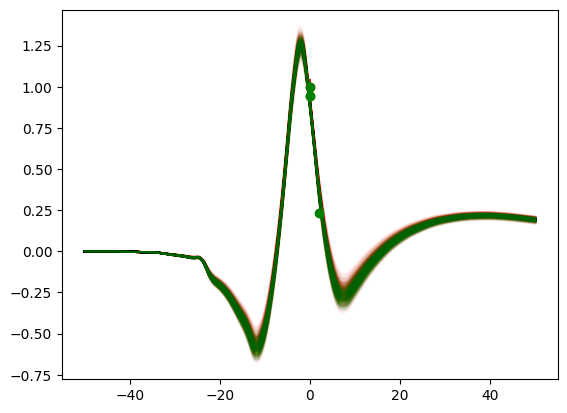

10


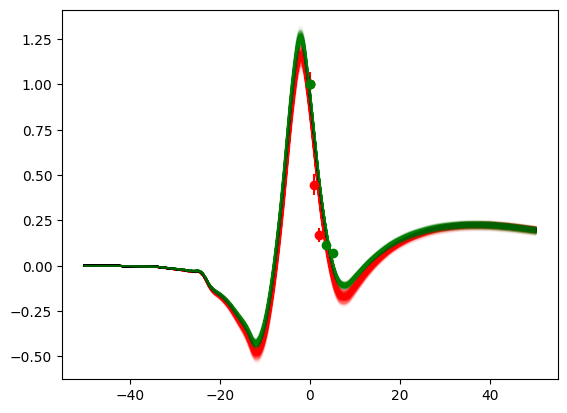

In [29]:
colors = ['r', 'g']
for event_num in range(len(index)):
    print(event_num)
    plt.figure()
    object_df = new_object_df[new_object_df['object_index']==event_num]
    for band in range(2):
        for sample_no in range(100):
            for chain_num in range(4):
                c1_ = mcmc_samples.c1_[sample_no, chain_num, event_num, band]
                c2 = mcmc_samples.c2[sample_no, chain_num, event_num, band]
                c3 = mcmc_samples.c3[sample_no, chain_num, event_num, band]
                c1 = c1_ - c2 - c3
#                 print(c1)
#                 print(c2)
#                 print(c3)
                
                predictions = parametric_fn_pcs(c1, c2, c3, pcs, np.arange(0,401, 1))
                #print( predictions)
                plt.plot(np.arange(-50, 50.25, .25), predictions, alpha=.03, color=colors[band])


        band_df = object_df[object_df['band_index']==band]
        plt.errorbar(band_df["time"], band_df["flux"], yerr=band_df["fluxerr"], fmt="o", color=colors[band])
        
    if event_num==10:
        break
    
    plt.show()
#     plt.hist(mcmc_samples.t_rise[sample_no, chain_num, event_num])
#     plt.show()
#     plt.hist(mcmc_samples.t_fall_[sample_no, chain_num, event_num])
#     plt.show()